In [319]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report

## Data Overview

In [387]:
train_df_filtered = pd.read_csv('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Datasets/train_df_filtered.csv')

test_df_filtered = pd.read_csv('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Datasets/test_df_filtered.csv')

# prev_loan_filtered = pd.read_csv('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Datasets/prev_loan_filtered.csv')

In [388]:
train_df_filtered.drop(columns = 'Unnamed: 0', inplace=True)
test_df_filtered.drop(columns = 'Unnamed: 0', inplace=True)

In [389]:
train_df_filtered.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,NAME_FAMILY_STATUS,ORGANIZATION_TYPE,OWN_CAR_AGE,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,N,Y,Working,Secondary / secondary special,House / apartment,-9461,-637,Single / not married,Business Entity Type 3,NaN,1.0,-1134.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,N,N,State servant,Higher education,House / apartment,-16765,-1188,Married,School,NaN,2.0,-828.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,Y,Y,Working,Secondary / secondary special,House / apartment,-19046,-225,Single / not married,Government,26.0,1.0,-815.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,N,Y,Working,Secondary / secondary special,House / apartment,-19005,-3039,Civil marriage,Business Entity Type 3,NaN,2.0,-617.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,N,Y,Working,Secondary / secondary special,House / apartment,-19932,-3038,Single / not married,Religion,NaN,1.0,-1106.0


In [390]:
train_df_filtered.fillna({'OWN_CAR_AGE':0}, inplace=True)

In [391]:
train_df_filtered.dropna(inplace=True)

In [392]:
test_df_filtered.fillna({'OWN_CAR_AGE':0}, inplace=True)

In [393]:
test_df_filtered.dropna(inplace=True)

## Data Exploration

In [394]:
# returns a table with the total of Na values and the percent
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending= False)
    percent = (data.isnull().mean() * 100).sort_values(ascending=False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [395]:
# only numeric columns
numeric_train_df = train_df_filtered.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_train_df.corr()
correlation_matrix

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
SK_ID_CURR,1.000000,-0.002115,-0.001142,-0.001821,-0.000367,-0.000432,-0.001480,0.001356,0.001592,-0.002910,-0.000863
TARGET,-0.002115,1.000000,0.019179,-0.003980,-0.030371,-0.012816,0.078248,-0.044939,0.002283,0.009303,0.055221
CNT_CHILDREN,-0.001142,0.019179,1.000000,0.012886,0.002142,0.021375,0.330962,-0.239834,0.068838,0.879164,-0.005862
AMT_INCOME_TOTAL,-0.001821,-0.003980,0.012886,1.000000,0.156866,0.191656,0.027261,-0.064221,0.021537,0.016342,-0.018586
AMT_CREDIT,-0.000367,-0.030371,0.002142,0.156866,1.000000,0.770139,-0.055431,-0.066842,0.027925,0.063154,-0.073711
AMT_ANNUITY,-0.000432,-0.012816,0.021375,0.191656,0.770139,1.000000,0.009444,-0.104331,0.042421,0.075539,-0.063747
DAYS_BIRTH,-0.001480,0.078248,0.330962,0.027261,-0.055431,0.009444,1.000000,-0.615871,0.084726,0.278903,0.082935
DAYS_EMPLOYED,0.001356,-0.044939,-0.239834,-0.064221,-0.066842,-0.104331,-0.615871,1.000000,-0.087921,-0.233561,0.023036
OWN_CAR_AGE,0.001592,0.002283,0.068838,0.021537,0.027925,0.042421,0.084726,-0.087921,1.000000,0.088191,-0.023626
CNT_FAM_MEMBERS,-0.002910,0.009303,0.879164,0.016342,0.063154,0.075539,0.278903,-0.233561,0.088191,1.000000,-0.027108


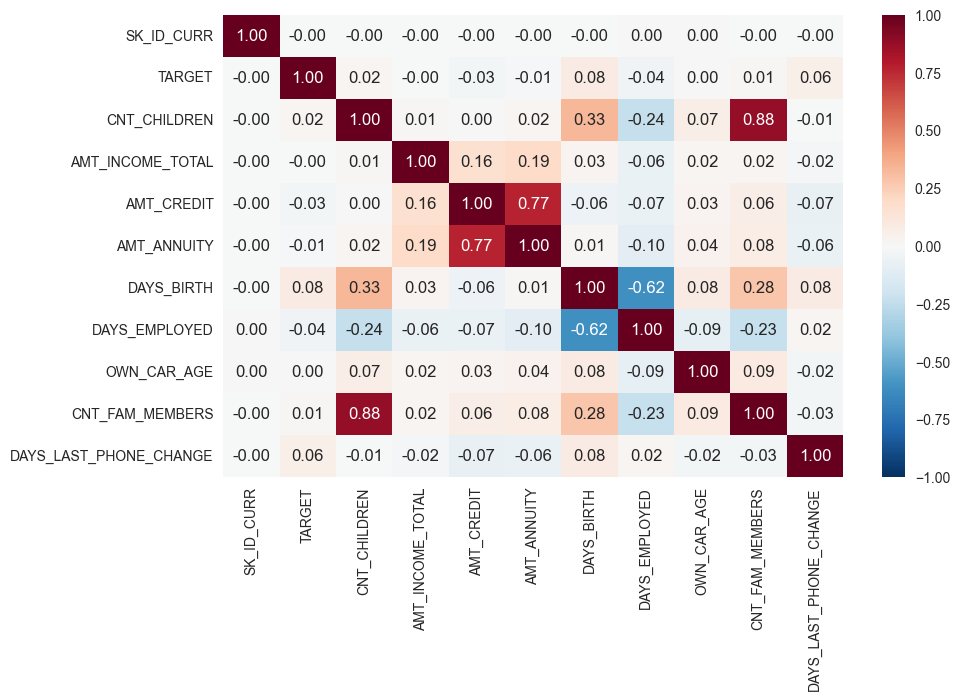

In [396]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(numeric_train_df.corr(),\
            fmt='.2f', annot=True, ax=ax, cmap='RdBu_r', vmin=-1, vmax=1)

plt.savefig('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Plots/correlation_of_columns.png')

From the correlation matrix, We concude that:
- 'CNT_CHILDREN' - 'CNT_FAM_MEMBERS' : 0.879164 [high positive correlation]
- 'AMT_CREDIT' - 'AMT_ANNUITY' : 0.770139 [high positive correlation]
- 'DAYS_BIRTH' - 'DAYS_EMPLOYED' : -0.615871 [ high negative correlation]

In [397]:
train_df_filtered.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'NAME_FAMILY_STATUS', 'ORGANIZATION_TYPE',
       'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [398]:
cols = ['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']

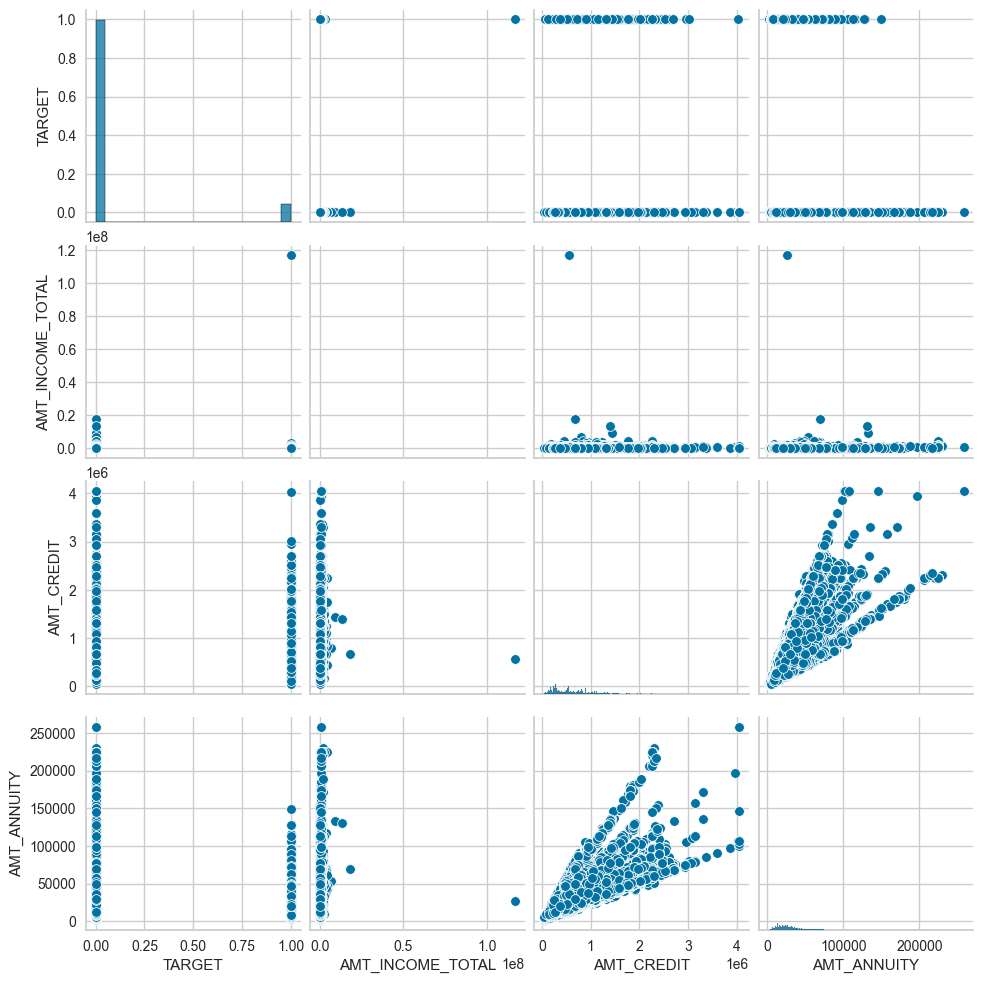

In [399]:
# get pairwise relation between columns
sns.pairplot(train_df_filtered[cols])

#### Selection will be only one of the collinear columns, the one that has the highest correlation with the target, the other will be dropped.

In [400]:
print(train_df_filtered['AMT_ANNUITY'].corr(train_df_filtered['TARGET']))
print(train_df_filtered['AMT_CREDIT'].corr(train_df_filtered['TARGET']))

-0.012816067603168847
-0.030371406404234958


In [401]:
# AMT_ANNUITY is higher than AMT_CREDIT in correlation with TARGET
num = [-0.012816067603168847, -0.030371406404234958]
max(num)

-0.012816067603168847

In [402]:
# drop AMT_CREDIT column from the data
del train_df_filtered['AMT_CREDIT']
del test_df_filtered['AMT_CREDIT']

In [403]:
# check the correlation between the columns and the target
print(train_df_filtered['CNT_CHILDREN'].corr(train_df_filtered['TARGET']))
print(train_df_filtered['CNT_FAM_MEMBERS'].corr(train_df_filtered['TARGET']))

0.01917898189424821
0.009302603602371935


In [404]:
# CNT_CHILDREN is higher than CNT_FAM_MEMBERS in correlation with TARGET
num = [0.01917898189424821, 0.009302603602371935]
max(num)

0.01917898189424821

In [405]:
del train_df_filtered['CNT_FAM_MEMBERS']
del test_df_filtered['CNT_FAM_MEMBERS']

In [406]:
# check the correlation between the columns and the target
print(train_df_filtered['DAYS_EMPLOYED'].corr(train_df_filtered['TARGET']))
print(train_df_filtered['DAYS_BIRTH'].corr(train_df_filtered['TARGET']))

-0.044938721587430515
0.07824849364252268


In [407]:
# here in this case the negative value is more correlated with the target
num = [-0.044938721587430515, 0.07824849364252268]
max(num)

0.07824849364252268

In [408]:
# drop DAYS_BIRTH column from the data
del train_df_filtered['DAYS_BIRTH']
del test_df_filtered['DAYS_BIRTH']

In [409]:
train_df_filtered.to_csv('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Datasets/app_train.csv')

test_df_filtered.to_csv('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Datasets/app_test.csv')

In [410]:
app_train = pd.read_csv('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Datasets/app_train.csv')

app_test = pd.read_csv('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Datasets/app_train.csv')

In [411]:
app_train.drop(columns = 'Unnamed: 0', inplace=True)
app_test.drop(columns = 'Unnamed: 0', inplace=True)

## Data Preprocessing

### 1. Standardization of numeric variables

In [412]:
numeric_cols = [ 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'DAYS_EMPLOYED','OWN_CAR_AGE', 'DAYS_LAST_PHONE_CHANGE']

In [413]:
app_train[numeric_cols]

,AMT_INCOME_TOTAL,AMT_ANNUITY,DAYS_EMPLOYED,OWN_CAR_AGE,DAYS_LAST_PHONE_CHANGE
0,202500.0,24700.5,-637,0.0,-1134.0
1,270000.0,35698.5,-1188,0.0,-828.0
2,67500.0,6750.0,-225,26.0,-815.0
3,135000.0,29686.5,-3039,0.0,-617.0
4,121500.0,21865.5,-3038,0.0,-1106.0
...,...,...,...,...,...
307491,157500.0,27558.0,-236,0.0,-273.0
307492,72000.0,12001.5,365243,0.0,0.0
307493,153000.0,29979.0,-7921,0.0,-1909.0
307494,171000.0,20205.0,-4786,0.0,-322.0


In [414]:
std_scaler = preprocessing.StandardScaler()
app_train[numeric_cols] = std_scaler.fit_transform(app_train[numeric_cols])

In [415]:
app_train[numeric_cols]

,AMT_INCOME_TOTAL,AMT_ANNUITY,DAYS_EMPLOYED,OWN_CAR_AGE,DAYS_LAST_PHONE_CHANGE
0,0.142133,-0.166144,-0.456229,-0.455287,-0.206984
1,0.426790,0.592665,-0.460129,-0.455287,0.163113
2,-0.427181,-1.404641,-0.453313,2.430514,0.178836
3,-0.142524,0.177866,-0.473231,-0.455287,0.418310
4,-0.199455,-0.361745,-0.473224,-0.455287,-0.173119
...,...,...,...,...,...
307491,-0.047638,0.031010,-0.453391,-0.455287,0.834367
307492,-0.408204,-1.042313,2.133554,-0.455287,1.164552
307493,-0.066615,0.198047,-0.507787,-0.455287,-1.144321
307494,0.009293,-0.476311,-0.485597,-0.455287,0.775103


#### 2. Transforming Categorical data

In [416]:
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_HOUSING_TYPE', 'DAYS_EMPLOYED', 'NAME_FAMILY_STATUS',
       'ORGANIZATION_TYPE', 'OWN_CAR_AGE', 'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [417]:
app_train.dtypes

SK_ID_CURR                  int64
TARGET                      int64
NAME_CONTRACT_TYPE         object
CODE_GENDER                object
CNT_CHILDREN                int64
AMT_INCOME_TOTAL          float64
AMT_ANNUITY               float64
FLAG_OWN_CAR               object
FLAG_OWN_REALTY            object
NAME_INCOME_TYPE           object
NAME_EDUCATION_TYPE        object
NAME_HOUSING_TYPE          object
DAYS_EMPLOYED             float64
NAME_FAMILY_STATUS         object
ORGANIZATION_TYPE          object
OWN_CAR_AGE               float64
DAYS_LAST_PHONE_CHANGE    float64
dtype: object

In [418]:
app_train.select_dtypes(include='object')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Working,Secondary / secondary special,House / apartment,Single / not married,Business Entity Type 3
1,Cash loans,F,N,N,State servant,Higher education,House / apartment,Married,School
2,Revolving loans,M,Y,Y,Working,Secondary / secondary special,House / apartment,Single / not married,Government
3,Cash loans,F,N,Y,Working,Secondary / secondary special,House / apartment,Civil marriage,Business Entity Type 3
4,Cash loans,M,N,Y,Working,Secondary / secondary special,House / apartment,Single / not married,Religion
...,...,...,...,...,...,...,...,...,...
307491,Cash loans,M,N,N,Working,Secondary / secondary special,With parents,Separated,Services
307492,Cash loans,F,N,Y,Pensioner,Secondary / secondary special,House / apartment,Widow,XNA
307493,Cash loans,F,N,Y,Working,Higher education,House / apartment,Separated,School
307494,Cash loans,F,N,Y,Commercial associate,Secondary / secondary special,House / apartment,Married,Business Entity Type 1


In [419]:
categorical_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'CNT_CHILDREN',  'FLAG_OWN_CAR', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'ORGANIZATION_TYPE']

In [420]:
# encoding the categorical columns using get_dummies
categorical_df = pd.get_dummies(app_train[categorical_cols], drop_first=True)

In [421]:
categorical_df_test = pd.get_dummies(app_test[categorical_cols], drop_first=True)

In [422]:
X_train = pd.concat([app_train[numeric_cols], categorical_df], axis=1, join='inner')

In [276]:
# split the data into training and testing and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, app_train['TARGET'], train_size = 0.7, test_size = 0.3, random_state = 0)

In [277]:
X_val = pd.concat([test_df_filtered[numeric_cols], categorical_df_test], axis=1, join='inner')

In [278]:
missing_data(X_train).head()

,Total,Percent
AMT_INCOME_TOTAL,0,0.0
ORGANIZATION_TYPE_Industry: type 13,0,0.0
ORGANIZATION_TYPE_Realtor,0,0.0
ORGANIZATION_TYPE_Postal,0,0.0
ORGANIZATION_TYPE_Police,0,0.0


In [279]:
missing_data(X_val).head()

,Total,Percent
AMT_INCOME_TOTAL,0,0.0
ORGANIZATION_TYPE_Industry: type 13,0,0.0
ORGANIZATION_TYPE_Realtor,0,0.0
ORGANIZATION_TYPE_Postal,0,0.0
ORGANIZATION_TYPE_Police,0,0.0


## Model Building 'Classification'

#### 1. Decision Tree Classifier

In [429]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [430]:
y_pred = DT_model.predict(X_val)

c:\Users\Sara Alzahaby\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


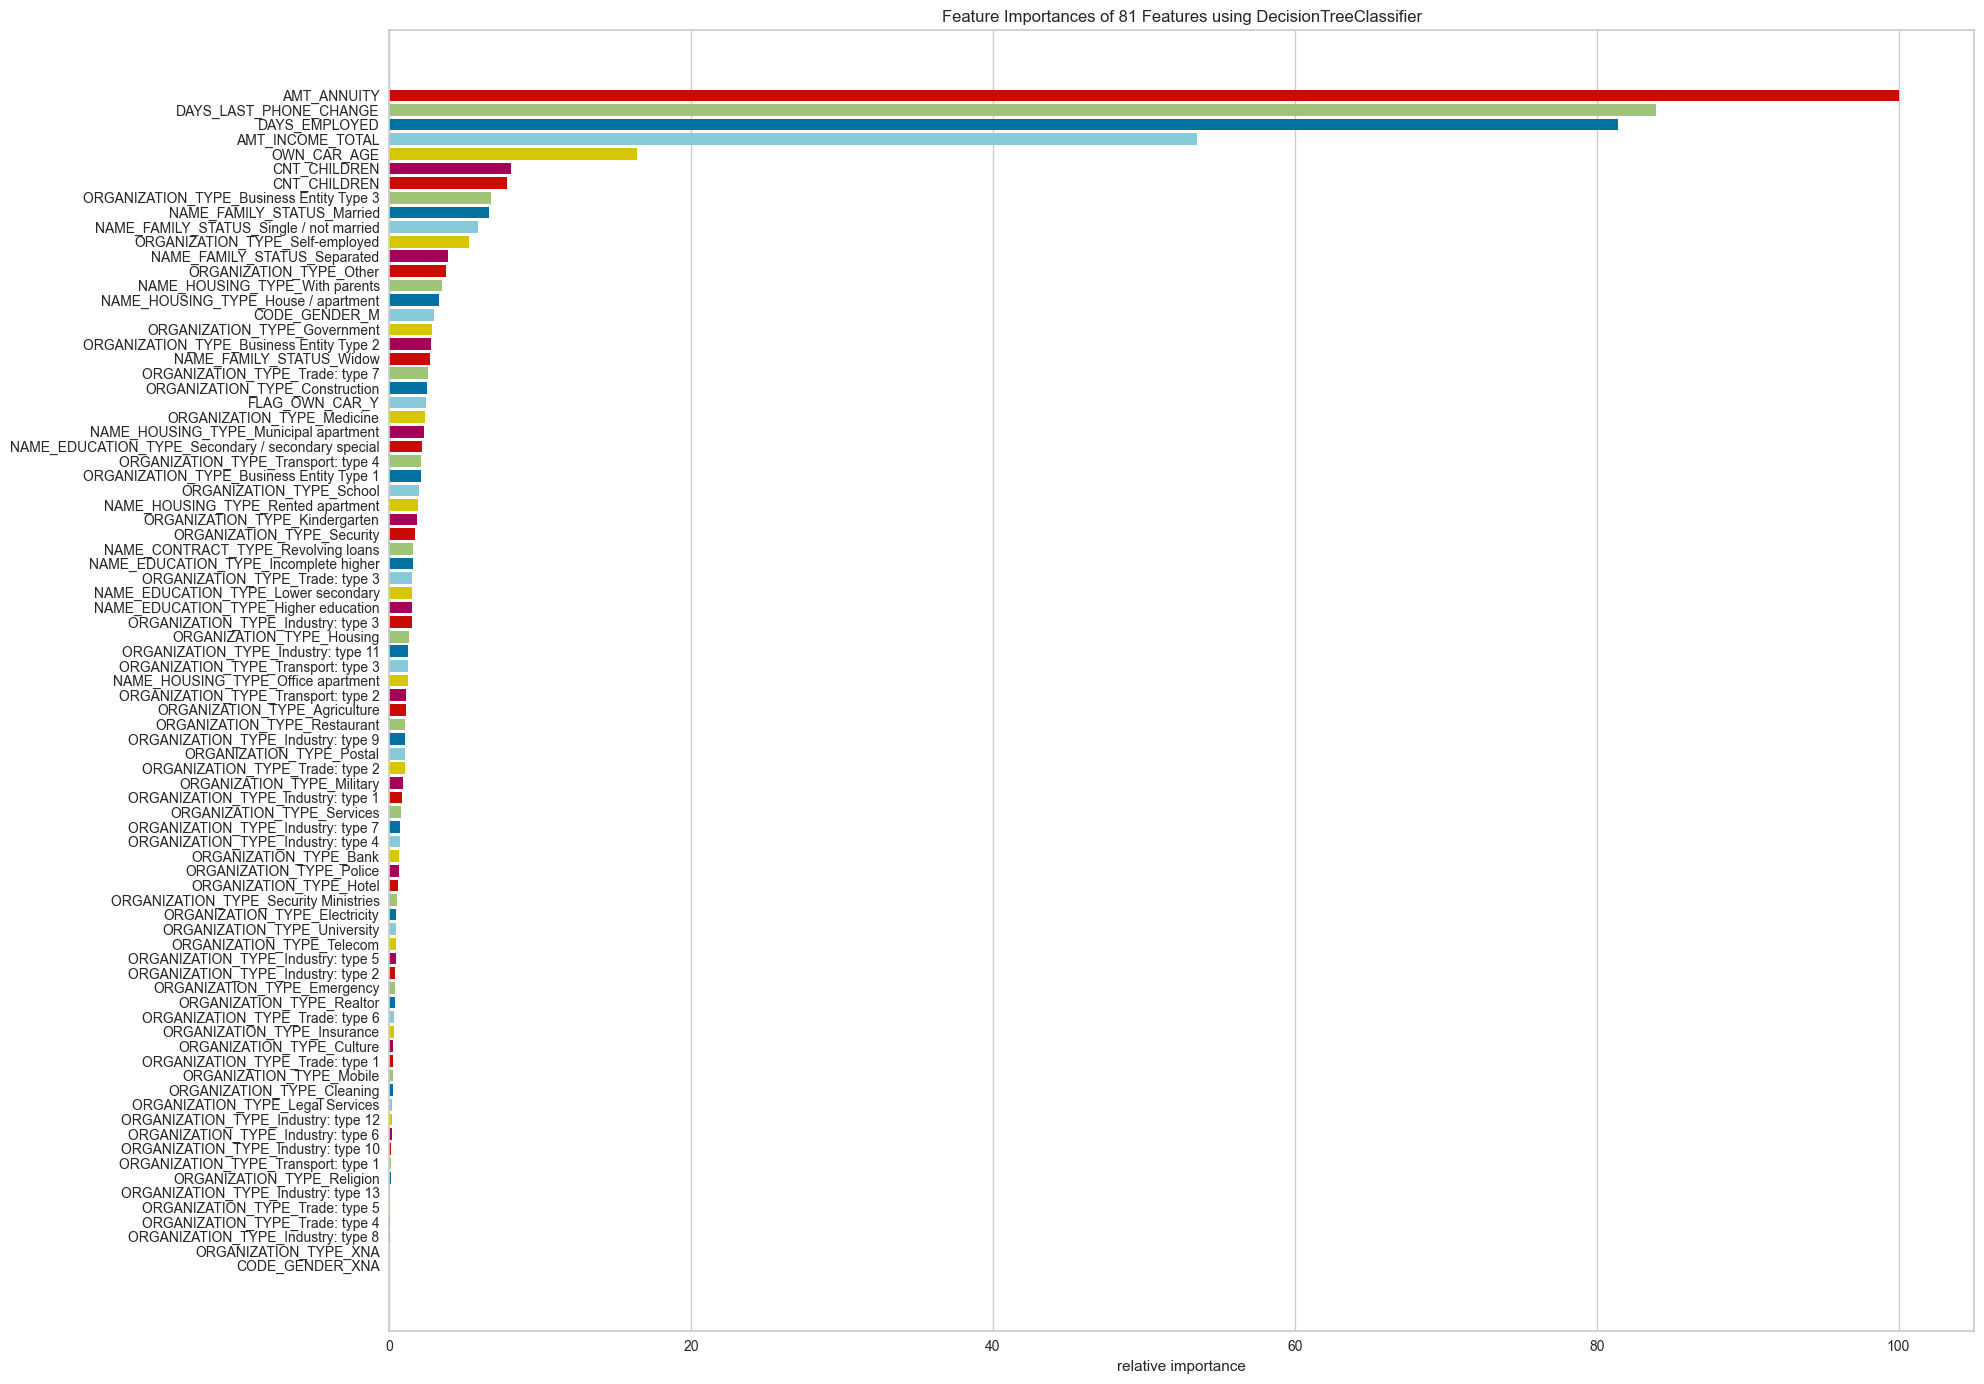

In [282]:
# get important features using yellowbrick
from yellowbrick.model_selection import FeatureImportances
fig, ax = plt.subplots(figsize=(20,14))
fi = FeatureImportances(DT_model)
fi.fit(X_train, y_train)
fi.poof()
fig.savefig('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Plots/features_importances_m2.png')

**Using just the features that has more impact on target**

In [423]:
# features with more impact on target
features = ['AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'DAYS_EMPLOYED','OWN_CAR_AGE', 'DAYS_LAST_PHONE_CHANGE', 'CNT_CHILDREN', 'ORGANIZATION_TYPE_Business Entity Type 3']

In [424]:
X_train = X_train[features]

In [425]:
X_train.head()

,AMT_INCOME_TOTAL,AMT_ANNUITY,DAYS_EMPLOYED,OWN_CAR_AGE,DAYS_LAST_PHONE_CHANGE,CNT_CHILDREN,ORGANIZATION_TYPE_Business Entity Type 3
0,0.142133,-0.166144,-0.456229,-0.455287,-0.206984,0,True
1,0.426790,0.592665,-0.460129,-0.455287,0.163113,0,False
2,-0.427181,-1.404641,-0.453313,2.430514,0.178836,0,False
3,-0.142524,0.177866,-0.473231,-0.455287,0.418310,0,True
4,-0.199455,-0.361745,-0.473224,-0.455287,-0.173119,0,False


In [426]:
X_train, X_val, y_train, y_val = train_test_split(X_train, app_train['TARGET'], test_size = 0.3, random_state = 0)

In [427]:
def df_value_counts(df, labels):
    df_counts = df.value_counts()
    dfs = pd.DataFrame({
        'labels': labels,
        'values': df_counts.values
    })
    return dfs

c:\Users\Sara Alzahaby\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


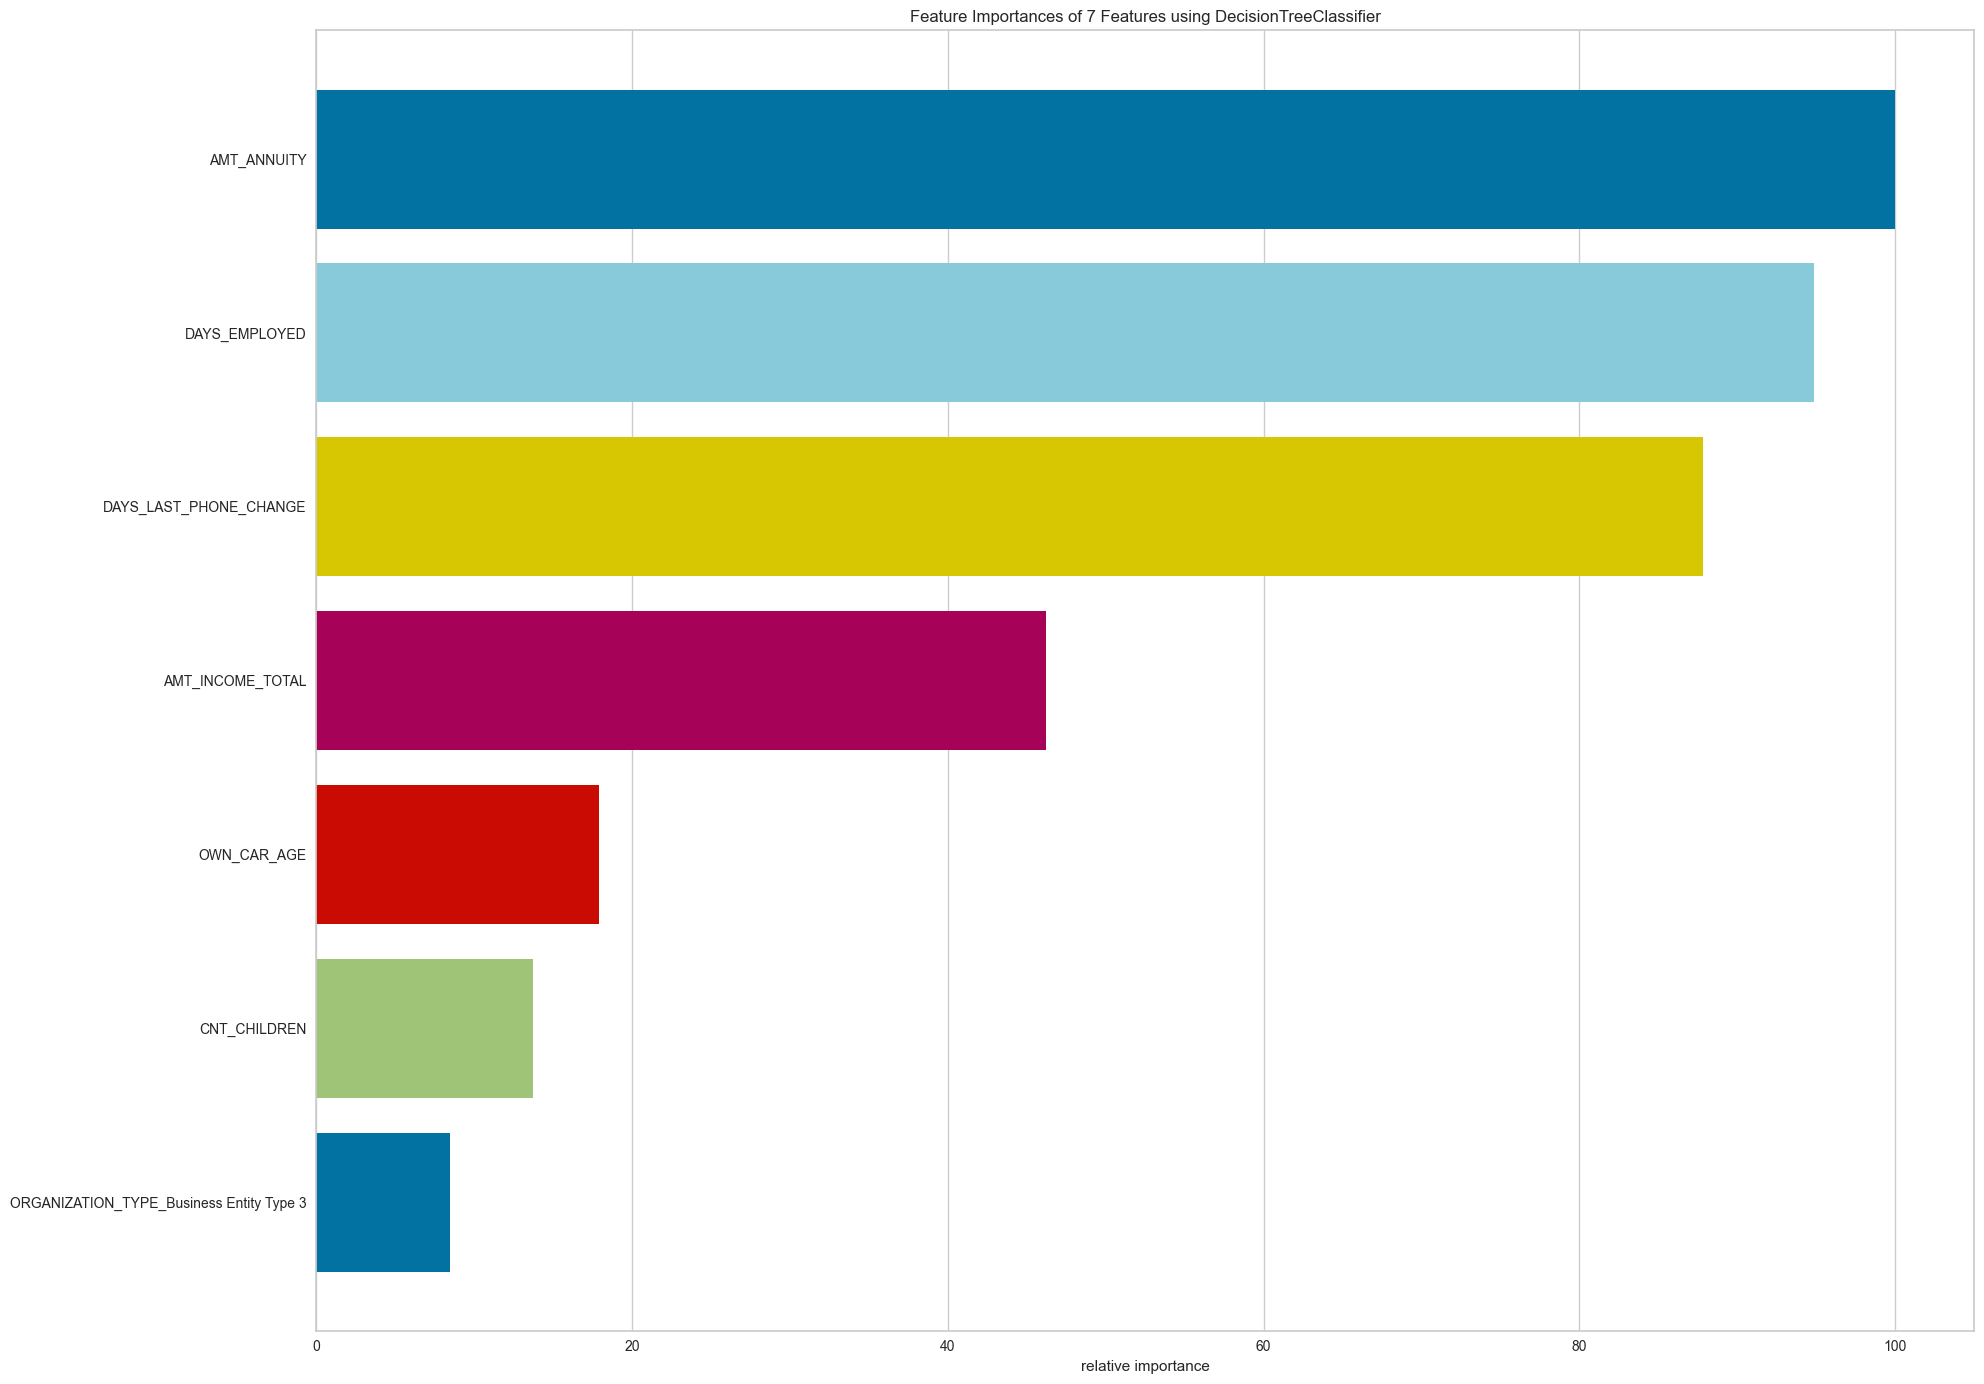

In [431]:
fig, ax = plt.subplots(figsize=(20,14))
fi = FeatureImportances(DT_model)
fi.fit(X_train, y_train)
fi.poof()
fig.savefig('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Plots/features_importances_m2.png')

#### Model Evaluation

Using Precision, f1-score, recall

In [433]:
# classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     84732
           1       0.10      0.12      0.11      7517

    accuracy                           0.84     92249
   macro avg       0.51      0.51      0.51     92249
weighted avg       0.85      0.84      0.85     92249



c:\Users\Sara Alzahaby\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


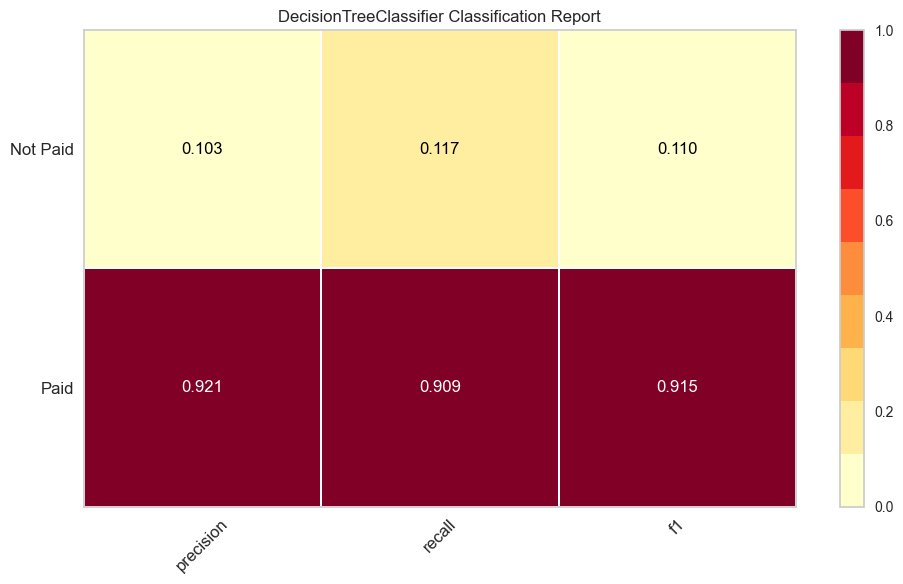

In [434]:
# plot the classification report wrt. the target
from yellowbrick.classifier import ClassificationReport

mapping = {0: "Paid", 1: 'Not Paid'}

fig, ax = plt.subplots(figsize= (10, 6))
cr = ClassificationReport(DT_model, classes=['Paid', 'Not Paid'], label_encoder=mapping)
cr.score(X_val, y_val)
cr.poof()
fig.savefig('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Plots/classification_report.png')

The model is weak with predicting who does not pay the loan.

#### using Confusion matrix

In [435]:
# confusion matrix
confusion_matrix(y_val, y_pred)

array([[77031,  7701],
       [ 6634,   883]], dtype=int64)

c:\Users\Sara Alzahaby\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


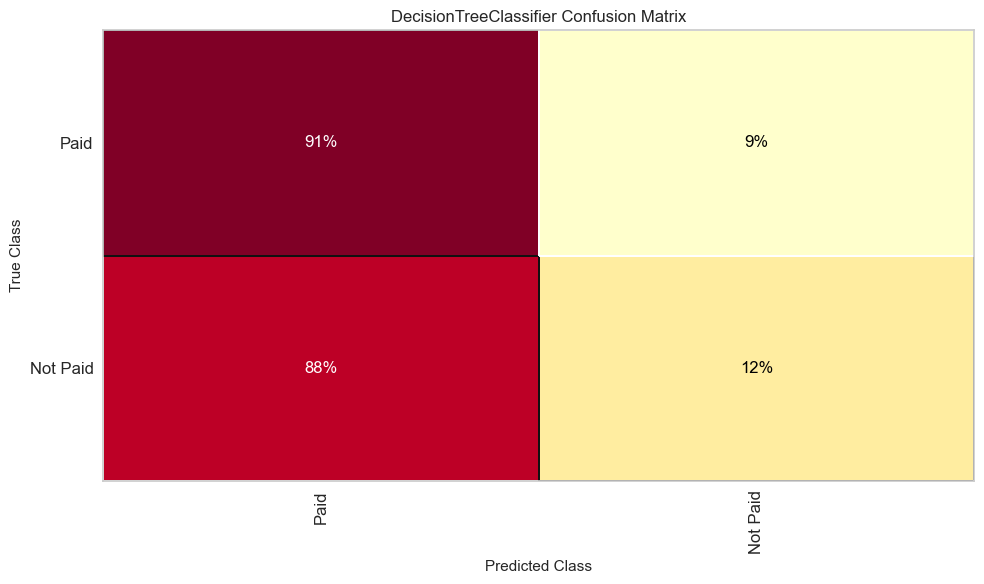

In [436]:
from yellowbrick.classifier import ConfusionMatrix

mapping = {0: "Paid", 1: 'Not Paid'}

fig, ax = plt.subplots(figsize=(10,6))
cm_viz = ConfusionMatrix(DT_model, classes= ["Paid", "Not Paid"], label_encoder= mapping, percent=True)
cm_viz.score(X_val, y_val)
cm_viz.poof()
fig.savefig('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Plots/confusion_matrix_percent.png')

The model has good prediction of who pays the loan, with an error percentage of only 9%, but with those who do not pay, the model cannot predict very well since the error percentage is 88%.

#### using ROC Curve

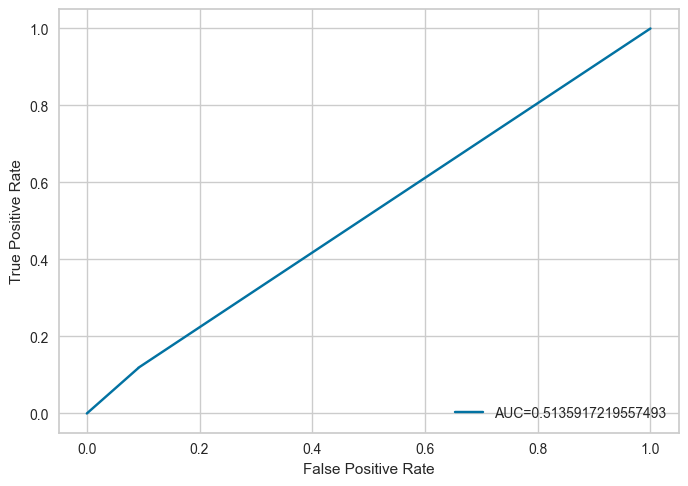

In [437]:
# define metrics
y_pred_proba = DT_model.predict_proba(X_val)[::,1]
fpr, tpr, _ = roc_curve(y_val,  y_pred_proba)
auc = roc_auc_score(y_val, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
fig.savefig('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Plots/ROC.png')

- Poor Model Performance: The model does not distinguish well between the positive and negative classes.
- AUC Score of 0.514: The model's ability to differentiate between the positive and negative classes is marginally better than random chance.

### DT_Model Summary:
- AUC Score: 0.514<br>
- Insights:
    - The model performs slightly better than random guessing.
    - It struggles to predict the positive class (those who do not pay).


### 2. XGBoost

In [438]:
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [439]:
y_pred = XGB_model.predict(X_val)

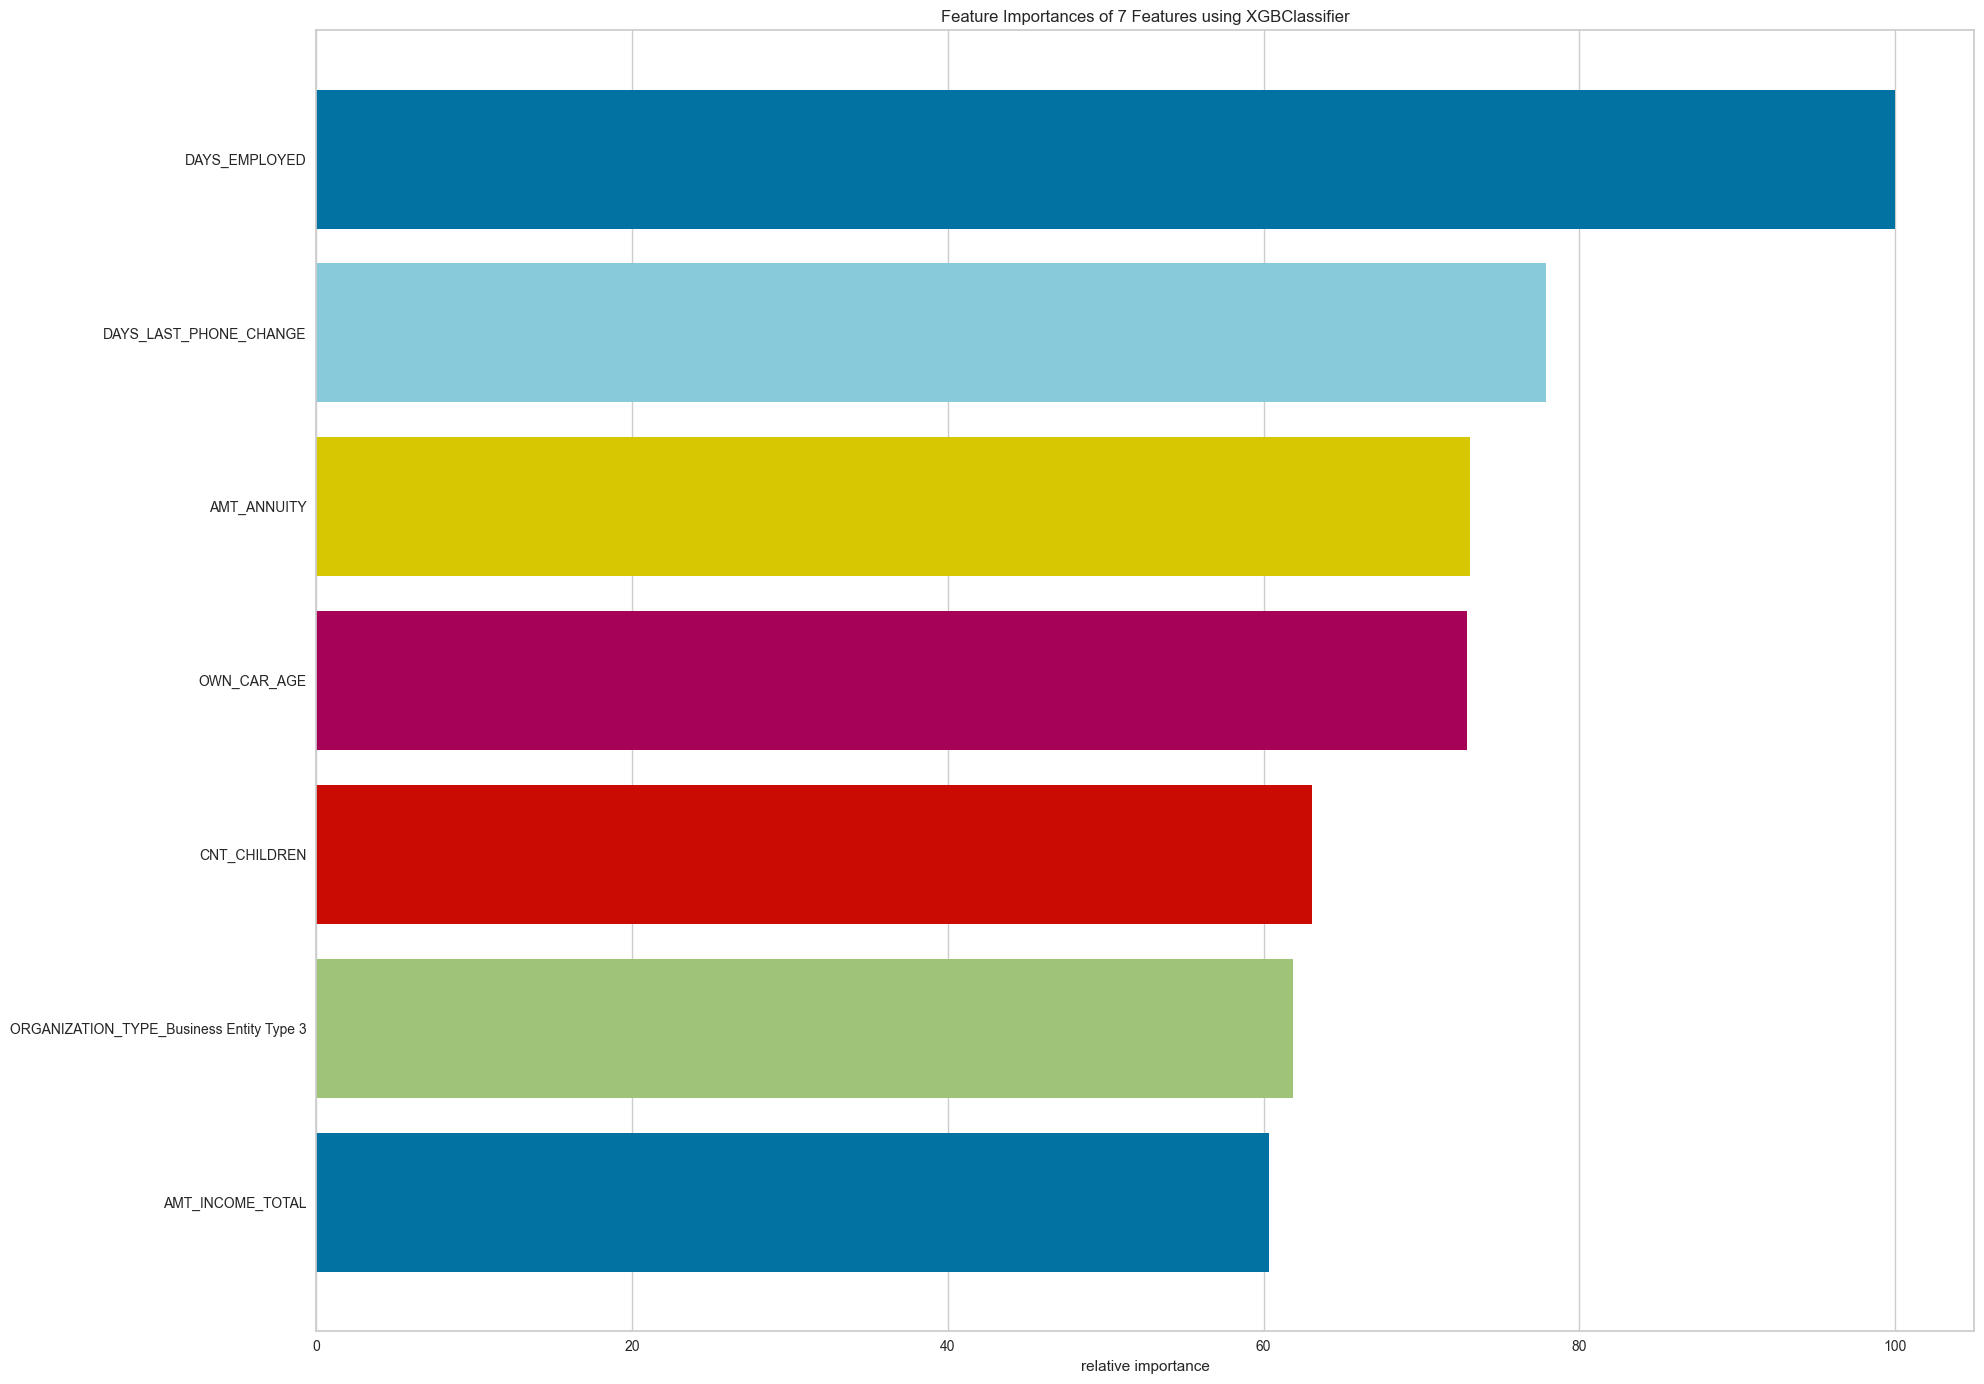

In [440]:
fig, ax = plt.subplots(figsize=(20,14))
fi = FeatureImportances(XGB_model)
fi.fit(X_train, y_train)
fi.poof()
fig.savefig('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Plots/features_importances_XGB.png')

In [441]:
# accuracy
XGB_model.score(X_val, y_val)

0.9184164597990222

In [442]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, precision_score, roc_curve
precision_score(y_val, y_pred)

0.09090909090909091

c:\Users\Sara Alzahaby\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


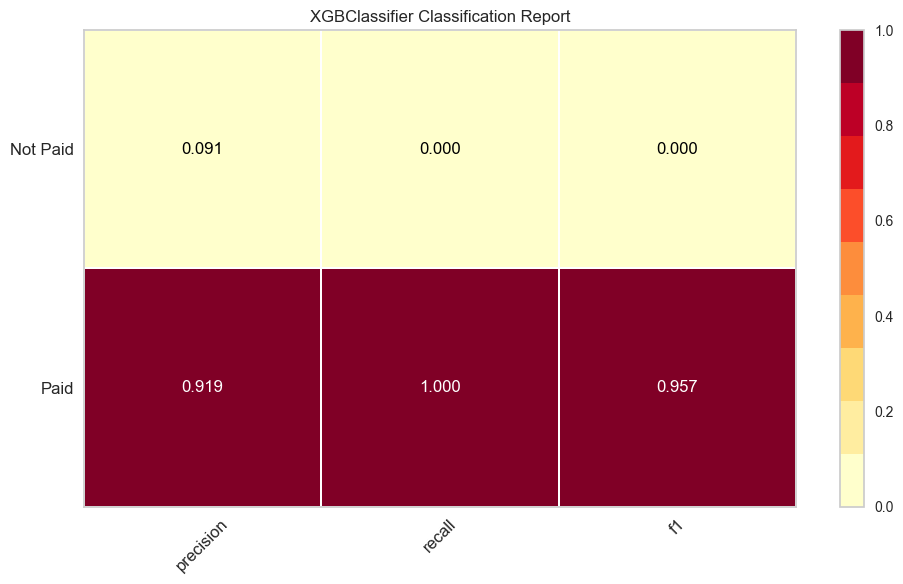

<Axes: title={'center': 'XGBClassifier Classification Report'}>

In [443]:
mapping = {0: "Paid", 1: 'Not Paid'}
fig, ax = plt.subplots(figsize= (10, 6))
cr = ClassificationReport(XGB_model, classes=['Paid', 'Not Paid'], label_encoder=mapping)
cr.score(X_val, y_val)
cr.poof()

In [444]:
# confusion matrix
confusion_matrix(y_val, y_pred)

array([[84722,    10],
       [ 7516,     1]], dtype=int64)

c:\Users\Sara Alzahaby\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


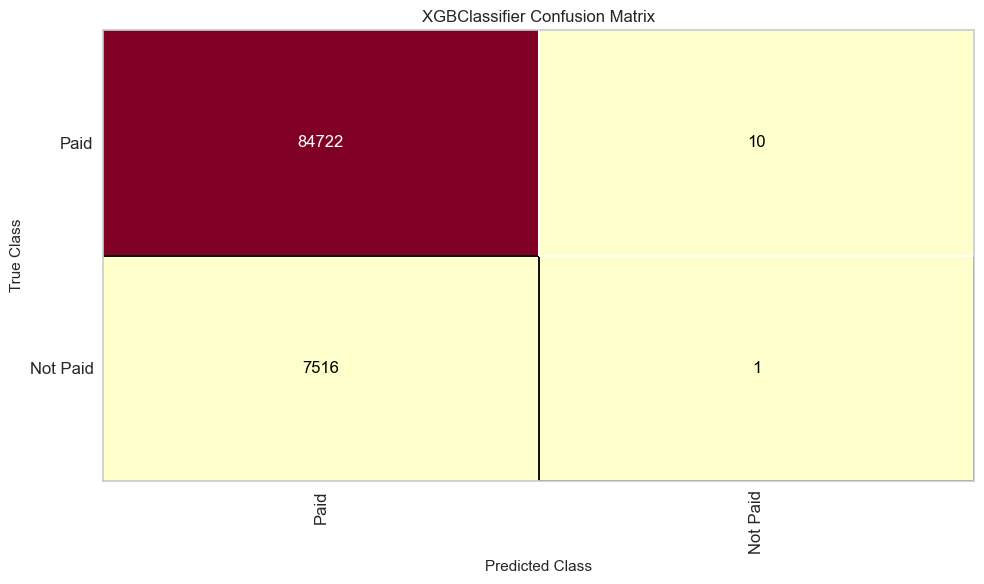

In [445]:
fig, ax = plt.subplots(figsize=(10,6))
cm_viz = ConfusionMatrix(XGB_model, classes= ["Paid", "Not Paid"], label_encoder= mapping)
cm_viz.score(X_val, y_val)
cm_viz.poof()
fig.savefig('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Plots/confusion_matrix.png')

The XGBoost model has abit better prediction of who pays the loan, with an error percentage of only 9%, but with those who do not pay, the model cannot predict very well since the error percentage is 88%

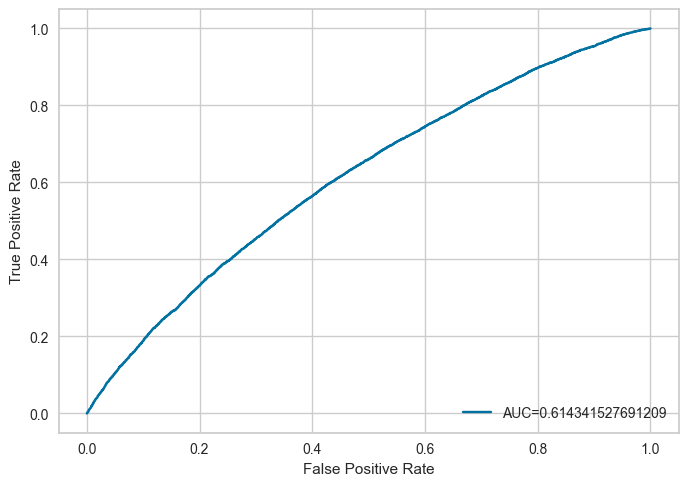

In [446]:
# define metrics for XGB
y_pred_proba = XGB_model.predict_proba(X_val)[::,1]
fpr, tpr, _ = roc_curve(y_val,  y_pred_proba)
auc = roc_auc_score(y_val, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
fig.savefig('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Plots/ROC_xgb.png')

- Moderate Model Performance: The ROC curve is above the diagonal line, indicating that the model has some discriminative power, but it is not very strong.
- AUC Score of 0.614: The model can differentiate between positive and negative classes, but not with high accuracy.

### XGB_Model Summary:
- AUC Score: 0.614
- Insights:
    - The model shows moderate discriminative power.
    - It has better performance compared to the Decision Tree but still has room for improvement.
    - The error rate for predicting non-payers is still high.


## 3. Random Forest Classifier

In [447]:
# implement Random Forest
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [448]:
y_pred = RF_model.predict(X_val)

c:\Users\Sara Alzahaby\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


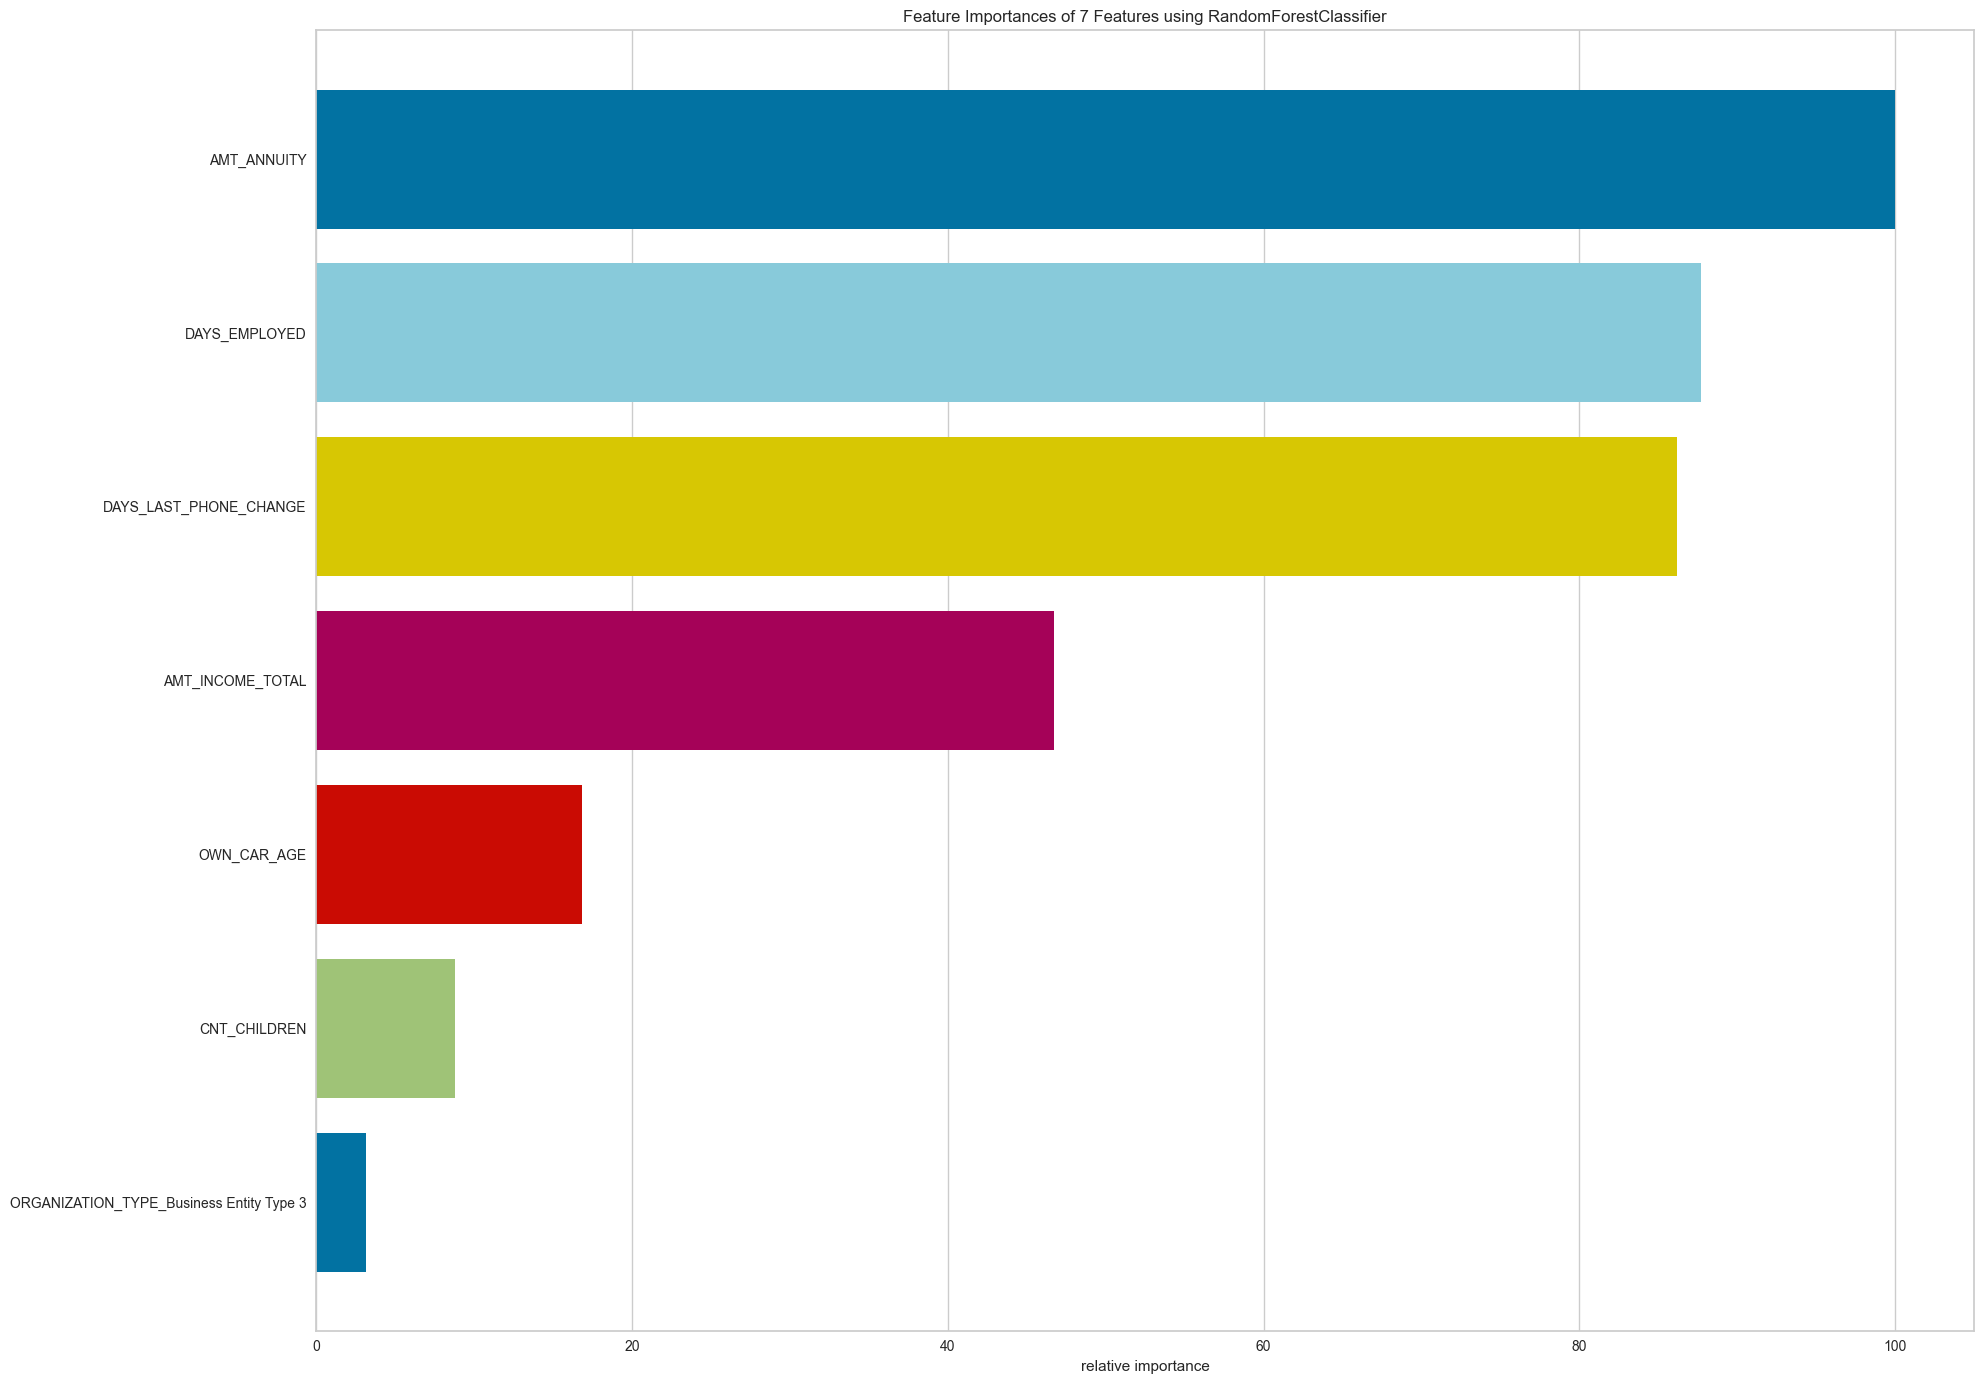

In [449]:
fig, ax = plt.subplots(figsize=(20,14))
fi = FeatureImportances(RF_model)
fi.fit(X_train, y_train)
fi.poof()
fig.savefig('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Plots/features_importances_RF.png')

In [461]:
#classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84732
           1       0.00      0.00      0.00      7517

    accuracy                           0.92     92249
   macro avg       0.46      0.50      0.48     92249
weighted avg       0.84      0.92      0.88     92249



c:\Users\Sara Alzahaby\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sara Alzahaby\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sara Alzahaby\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Sara Alzahaby\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


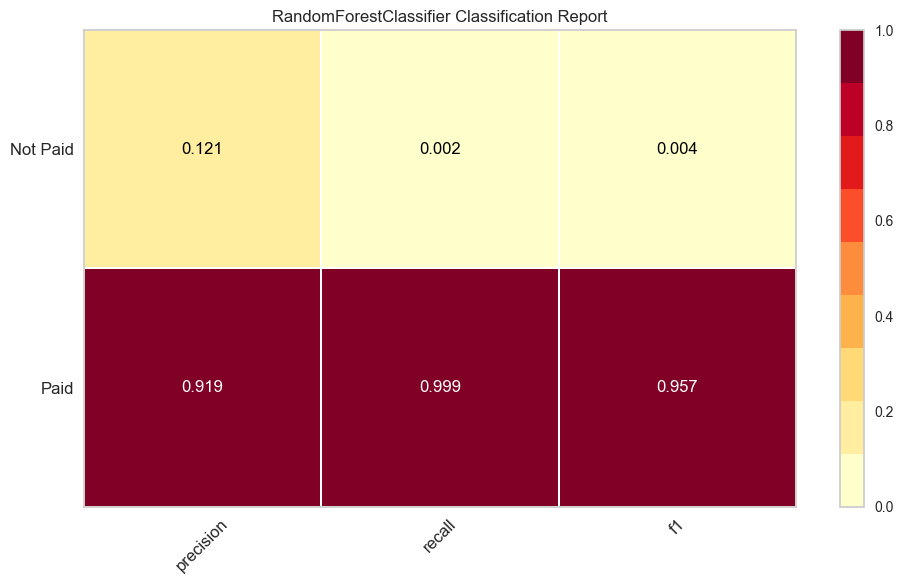

In [453]:
mapping = {0: "Paid", 1: 'Not Paid'}
fig, ax = plt.subplots(figsize= (10, 6))
cr = ClassificationReport(RF_model, classes=['Paid', 'Not Paid'], label_encoder=mapping)
cr.score(X_val, y_val)
cr.poof()
fig.savefig('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Plots/classification_report_RF.png')

In [454]:
# confusion matrix
confusion_matrix(y_val, y_pred)

array([[84630,   102],
       [ 7503,    14]], dtype=int64)

c:\Users\Sara Alzahaby\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


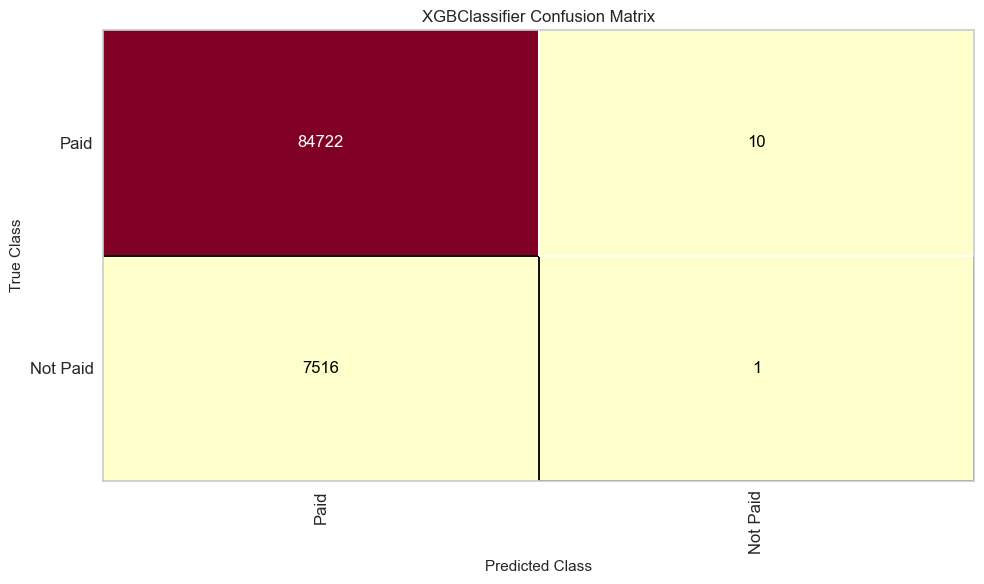

In [455]:
fig, ax = plt.subplots(figsize=(10,6))
cm_viz = ConfusionMatrix(XGB_model, classes= ["Paid", "Not Paid"], label_encoder= mapping)
cm_viz.score(X_val, y_val)
cm_viz.poof()
fig.savefig('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Plots/confusion_matrix_RF.png')

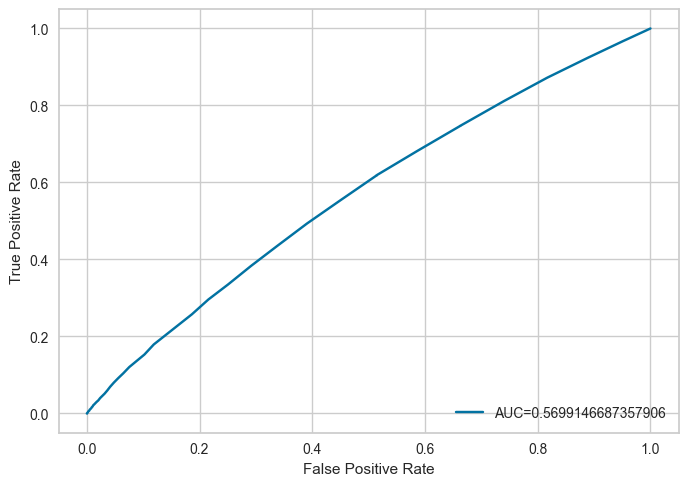

In [456]:
# define metrics for RF
y_pred_proba = RF_model.predict_proba(X_val)[::,1]
fpr, tpr, _ = roc_curve(y_val,  y_pred_proba)
auc = roc_auc_score(y_val, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
fig.savefig('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Plots/ROC_RF.png')

- Moderate to Poor Model Performance: The ROC curve is slightly above the diagonal line, indicating that the model has some discriminative power, but it is not strong.
- AUC Score of 0.570: The model has some ability to discriminate between the positive and negative classes, but it is still relatively weak.

### RF_Model Summary:
- AUC Score: 0.570
- Insights:
    - Similar to XGBoost, it shows moderate performance.
    - Better than the Decision Tree but still not highly accurate.
    - Struggles with predicting non-payers accurately.

In [459]:
# implement histgradient boosting classifier
HGB_model = HistGradientBoostingClassifier()
HGB_model.fit(X_train, y_train)

c:\Users\Sara Alzahaby\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


HistGradientBoostingClassifier()

In [460]:
y_pred = HGB_model.predict(X_val)

c:\Users\Sara Alzahaby\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


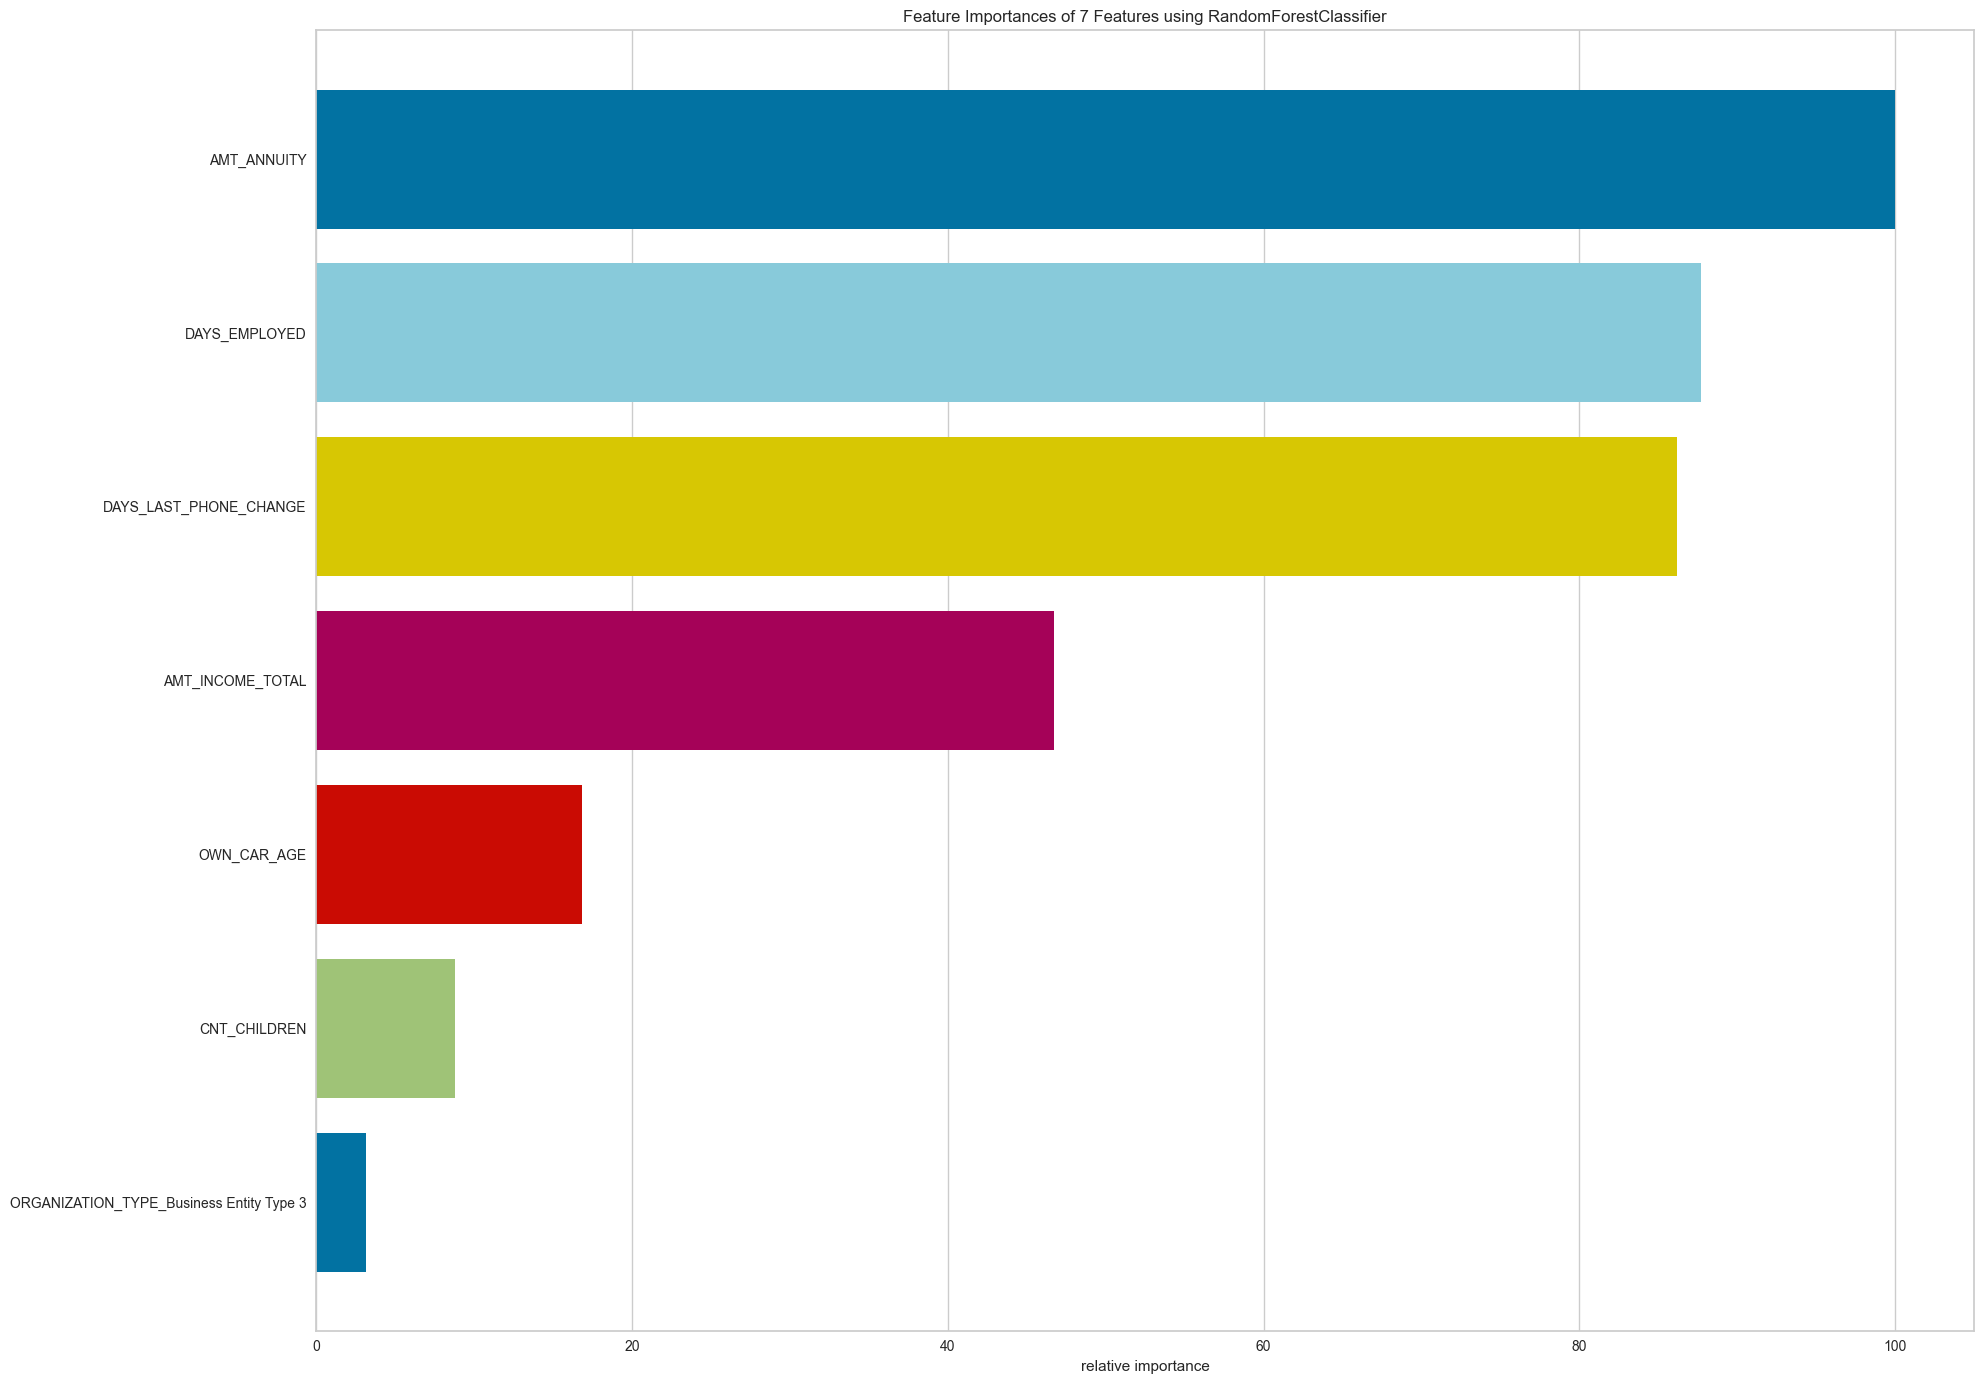

In [463]:
fig, ax = plt.subplots(figsize=(20,14))
fi = FeatureImportances(RF_model)
fi.fit(X_train, y_train)
fi.poof()
fig.savefig('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Plots/features_importances_HGB.png')

In [464]:
#classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84732
           1       0.00      0.00      0.00      7517

    accuracy                           0.92     92249
   macro avg       0.46      0.50      0.48     92249
weighted avg       0.84      0.92      0.88     92249



c:\Users\Sara Alzahaby\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sara Alzahaby\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sara Alzahaby\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Sara Alzahaby\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
c:\Users\Sara Alzahaby\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


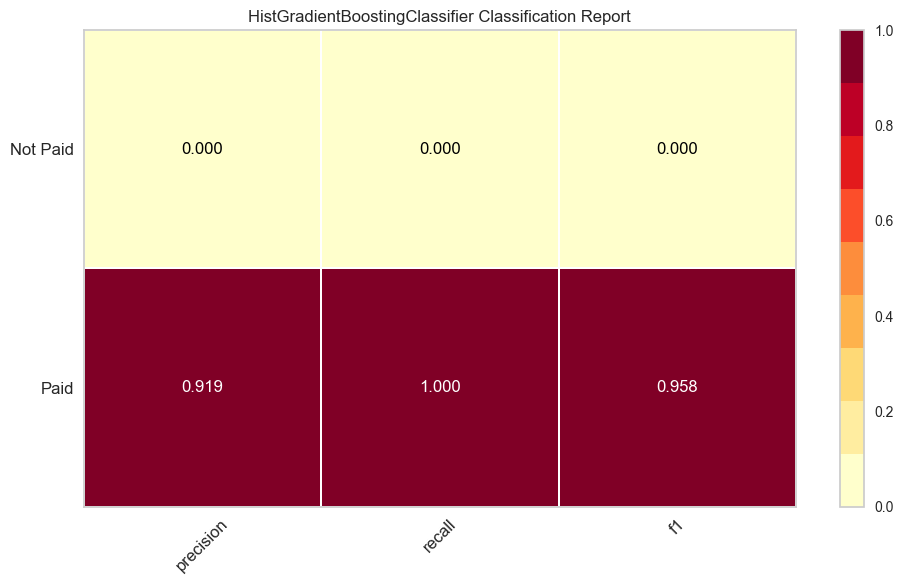

In [462]:
mapping = {0: "Paid", 1: 'Not Paid'}
fig, ax = plt.subplots(figsize= (10, 6))
cr = ClassificationReport(HGB_model, classes=['Paid', 'Not Paid'], label_encoder=mapping)
cr.score(X_val, y_val)
cr.poof()
fig.savefig('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Plots/classification_report_HGB.png')

In [465]:
# confusion matrix
confusion_matrix(y_val, y_pred)

array([[84732,     0],
       [ 7517,     0]], dtype=int64)

c:\Users\Sara Alzahaby\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


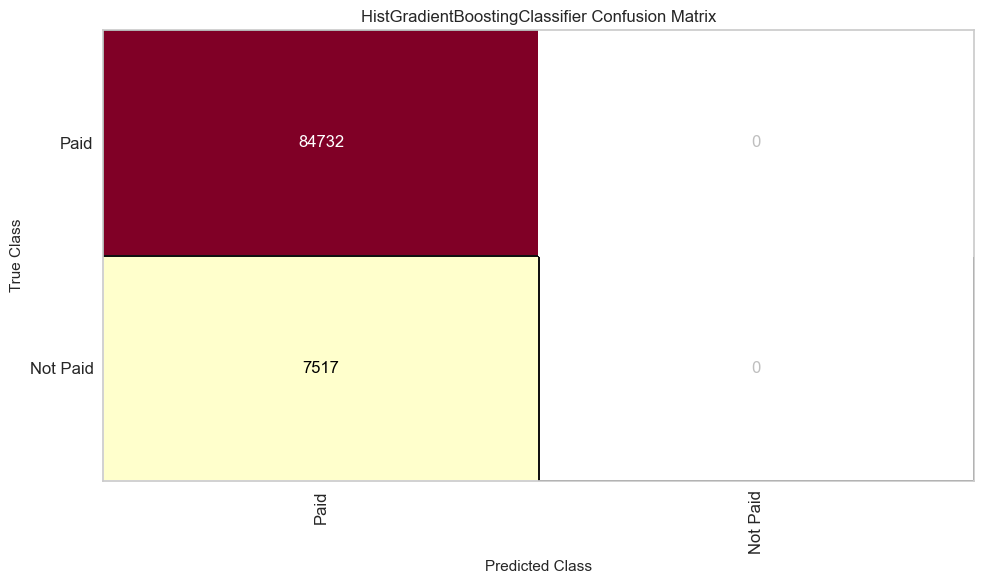

In [467]:
fig, ax = plt.subplots(figsize=(10,6))
cm_viz = ConfusionMatrix(HGB_model, classes= ["Paid", "Not Paid"], label_encoder= mapping)
cm_viz.score(X_val, y_val)
cm_viz.poof()
fig.savefig('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Plots/confusion_matrix_HGB.png')

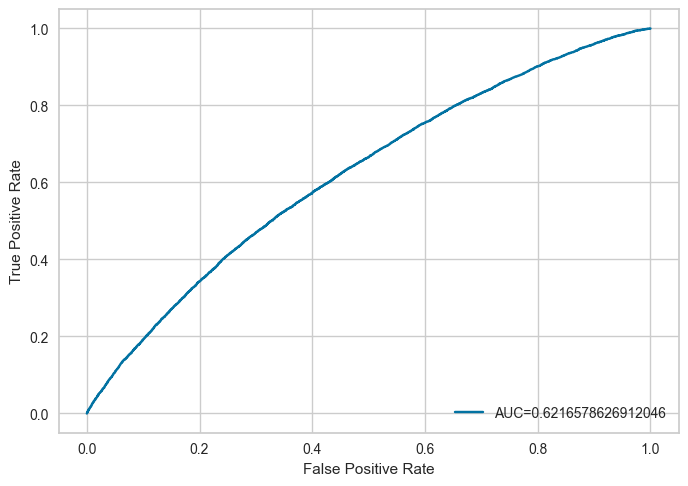

In [468]:
# define metrics for RF
y_pred_proba = HGB_model.predict_proba(X_val)[::,1]
fpr, tpr, _ = roc_curve(y_val,  y_pred_proba)
auc = roc_auc_score(y_val, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
fig.savefig('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Plots/ROC_HGB.png')

### HGB_Model Summary:
- AUC Score: 0.621
- Insights:
    - better and closer to XGBoost, it shows moderate performance.
    - Better than the Decision Tree and Random Forest but still not highly accurate.
    - Struggles with predicting non-payers accurately.


In [469]:
import joblib
joblib.dump(HGB_model, 'HGB_model.pkl')

['HGB_model.pkl']

## Final Insights:

- Data Information:
    - AMT_ANNUITY is the factor that has the most impact on whether the client pays the loan or not as well as the number of days of employment.

    - The number of days the client has changed their phone also has a big impact on whether they will repay the loan.

    - Whether or not to own a home and the number of children has little impact on the ability to repay the loan.

    - Whether the client has a home or not has little effect on the loan payment

    - There is not a large amount of data on who has not repaid the loan, so the model is not as efficient in predicting this scenario.

- Model Performance:

    - All four models (Decision Tree, XGBoost, Random Forest, HistgradientBoosting) have shown moderate to poor performance, with AUC scores ranging from 0.514 to 0.621.
    - HistgradientBoosting has the highest AUC score, indicating it is the best among the four but still not very strong.

- Feature Importance:

    - Features like AMT_INCOME_TOTAL, AMT_ANNUITY, DAYS_EMPLOYED, OWN_CAR_AGE, and DAYS_LAST_PHONE_CHANGE were identified as important.

- Confusion Matrix Insights:

    - All models have a high error rate in predicting non-payers (those who default).
    - They perform relatively better in predicting payers.
    
**Future work**
1. Model Improvement:

    - Hyperparameter Tuning: Use Grid Search or Random Search to find the best hyperparameters for XGBoost and HistgradientBoosting.

    - Feature Engineering: Create new features or transform existing ones to better capture the patterns in the data.

    - Ensemble Methods: Combine multiple models (e.g., stacking, boosting) to improve overall performance.

2. Data Considerations:

    - Class Imbalance: Address the imbalance between payers and non-payers using techniques like SMOTE technique.
    - Additional Data: If possible, gather more data or use external datasets to enrich the training data.